## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>

If you want some more information on him: https://www.youtube.com/watch?v=toTWSmb-krw


<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

**Let's begin exploring how Dr. Semmelweis came to his conclusions!**

In [1]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## 2. Dr. Semmelweis dataset
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>


---

**Exercise**

Explore the yearly dataset 
1.  How many variables does it have?
2.  How many numerical variables and how many categorical variables does it have?



Do you need any Help?
1. Numerical and categorical data: https://www.youtube.com/watch?v=OdMSVlqgYfI
2. Functions to explore a dataset with pandas:

```
.info()
.describe()
.size()
.shape()
.columns()
.dtypes
```


**Groupby**

For pandas exists an awesome function to analyze categorical variables with groupby. Here you find an intro to groupby:
https://www.youtube.com/watch?v=qy0fDqoMJx8

Basically it is about grouping your data by the groups of the categorical variable. For example here we have two clinics. We can group the data by the clinic and calculate, visualize etc for each clinic. Let's try that out!


In [0]:
yearly.groupby("clinic").count()
# here we group by clinic and count the amount of entries per variable for each clinic

,year,births,deaths
clinic,,,
clinic 1,6,6,6
clinic 2,6,6,6


In [0]:
yearly.groupby("clinic").mean()
# here we group by clinic and calculate the mean per variable for each clinic

,year,births,deaths
clinic,,,
clinic 1,1843.5,3340.333333,331.500000
clinic 2,1843.5,2965.166667,115.166667




---

**Exercise**

1. Calculate the median for all variables per clinic
2. Which clinic has more births in total?
3. Which clinich has more deaths in total?

---

**Exercise**

1.  How many mean births are there per year?
2.  How many deaths there per year?


Need help?

- You have to group per year and then calculate the mean and sums.

## 3. The alarming number of deaths
<p> So we have some basic understanding of the dataset and the background. To dive deeper into the topic, lets have a look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

**Exercise**

1. Add a new column called `proportion_deaths` which calculates each year's death rate.
2. Create new `DataFrames` titled `yearly_1` and `yearly_2` for Clinic 1 and Clinic 2, respectively.
3. How does the proportion of deaths compare in Clinic 1 vs Clinic 2?

## 4. Death at the clinics
<p>If we now plot the proportion of deaths at both clinic 1 and clinic 2  we'll see a curious pattern...</p>

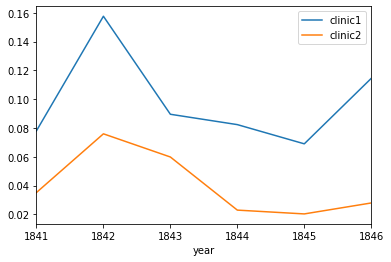

In [0]:
# This makes plots appear in the notebook

# Plot yearly proportion of deaths at the two clinics
ax = yearly_1.plot(y="proportion_deaths", x="year",
              label="clinic1")
yearly_2.plot(y="proportion_deaths", x="year",
         label="clinic2", ax=ax);

## 5. The handwashing begins
<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [0]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/monthly_deaths.csv', parse_dates = ['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

**Exercise**

1. Explore the dataset
2. Get the maximum, minimum, mean, median, and standard deviation of the death rate (`proportion_deaths`)
3. Create a new column called `month` using the `.apply()` method. Use the month's full name (i.e. `January`, `February`, `March`, etc.)
4. Convert the month column to the data type `category`

In [0]:
# your code

**Exercise**

1. Use `.apply()` to create a new categorical column for the `proportion_deaths` titled `prop_deaths_category` with the following logic:
 - `expected`: Within one standard deviation from the mean
 - `moderate`: Within 1-2 standard deviations from the mean
 - `high`: More than two standard deviations from the mean
2. Get the frequency of each proportion of deaths category (i.e. how many months are labeled `expected`, `moderate`, `high`?)
3. Use `.map()` to create a new column called `month_abreviation` that is the three letter abbreviation of each month.
4. Create a new column called `year` using a `lambda` function and `.apply()`


**Need some help?**

- check out our older notebooks on pandas
- this blog post: https://medium.com/@evelynli_30748/map-apply-applymap-with-the-lambda-function-5e83028be759
- this video might help: https://www.youtube.com/results?search_query=map%2C+apply+pandas

In [0]:
# Your Code

## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

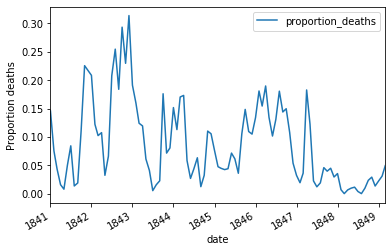

In [0]:
# Plot monthly proportion of deaths
ax = monthly.plot(x = 'date', y = 'proportion_deaths')
ax.set_ylabel('Proportion deaths');

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

**Exercise**

1. Create two new `DataFrames` called `before_washing` and `after_washing` that splits the data from when handwashing begins (`1847-06-01`)
2. Run the Plot cell below, if you created the DataFrames successfully, you should see one chart with two different line plots representing the time period before and after handwashing began.


**Help**
- if you need some help with dates and how to separate the dataset by the date, checkout this blogpost: https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d

In [0]:
# Your Code

**Run this to see if you did the exercise above correctly:**

*Note: you don't have to change the code in this cell.*

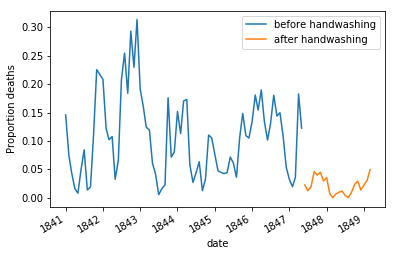

In [0]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x = 'date', y = 'proportion_deaths', label = "before handwashing")
after_washing.plot(y="proportion_deaths", x="date",
         label="after handwashing", ax=ax)
ax.set_ylabel('Proportion deaths');

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

**Exercise**

1. What is the mean porportion deaths before handwashing and after?
2. Calculate the difference in mean monthly proportion of deaths due to handwashing

In [0]:
# Your Code

## 8. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

In [0]:
# That concludes "Dr. Semmelweis and the discovery of handwashing"